# Question 1

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Importing the dataset
df = pd.read_csv("Power_Generation_Dataset.csv")
display(df)

,ROWID,Country,State LGD Code,State,Actual energy generated,Category of Plant,Type of fuel used,Installed Capacity,Generation Programme is prepared by CEA,Region,Region ID,Sector of power plant,Name of coal company,Station Name,SourceMonth,SourceYear,YearCode,Year,MonthCode,Month
0,1,India,22,Chhattisgarh,0.0,THERMAL,COAL,0.0,0.0,WESTERN,REG2,PRIVATE IPP,WPCL,AKALTARA TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
1,2,India,2,Himachal Pradesh,0.0,HYDRO,HYDRO,0.0,0.0,NORTHERN,REG1,PRIVATE IPP,ADHPL,ALLAIN DUHANGAN HPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
2,3,India,27,Maharashtra,0.0,THERMAL,COAL,0.0,0.0,WESTERN,REG2,PRIVATE IPP,IBPL,AMARAVATI TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
3,4,India,9,Uttar Pradesh,0.0,THERMAL,COAL,0.0,0.0,NORTHERN,REG1,PRIVATE IPP,LAPPL,ANPARA C TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
4,5,India,22,Chhattisgarh,0.0,THERMAL,COAL,0.0,0.0,WESTERN,REG2,PRIVATE IPP,KWPCL,AVANTHA BHANDAR,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46670,46671,India,24,Gujarat,0.0,THERMAL,NATURAL GAS,NaN,NaN,WESTERN,REG2,PVT,TOR. POW. (UNOSUGEN),VATWA CCPP,Jun - 2016,2016,2016,"Calendar Year (Jan - Dec), 2016",201606,"June, 2016"
46671,46672,India,24,Gujarat,0.0,THERMAL,NATURAL GAS,NaN,NaN,WESTERN,REG2,PVT,TOR. POW. (UNOSUGEN),VATWA CCPP,May - 2016,2016,2016,"Calendar Year (Jan - Dec), 2016",201605,"May, 2016"
46672,46673,India,24,Gujarat,0.0,THERMAL,NATURAL GAS,NaN,NaN,WESTERN,REG2,PVT,TOR. POW. (UNOSUGEN),VATWA CCPP,Nov - 2016,2016,2016,"Calendar Year (Jan - Dec), 2016",201611,"November, 2016"
46673,46674,India,24,Gujarat,0.0,THERMAL,NATURAL GAS,NaN,NaN,WESTERN,REG2,PVT,TOR. POW. (UNOSUGEN),VATWA CCPP,Oct - 2016,2016,2016,"Calendar Year (Jan - Dec), 2016",201610,"October, 2016"


In [3]:
# Displaying the Total Installed Capacity for each state in decreasing order
installed_capacities_by_state = df.groupby('State')['Installed Capacity'].sum().reset_index()
display(installed_capacities_by_state.sort_values(by='Installed Capacity', ascending=False).reset_index())

,index,State,Installed Capacity
0,17,Maharashtra,2365299.000
1,8,Gujarat,2083877.750
2,30,Uttar Pradesh,2005771.620
3,32,West Bengal,1529812.400
4,27,Tamil Nadu,1394109.006
5,16,Madhya Pradesh,1295150.000
6,5,Chhattisgarh,1205254.000
7,13,Karnataka,977240.020
8,1,Andhra Pradesh,929032.800
9,28,Telangana,918945.000


In [4]:
# The company with the highest number of power plants
company_series = df['Name of coal company']
mode_comp = company_series.mode()
counts = company_series.value_counts()
display(counts[mode_comp])

Name of coal company
TNGDCL    2889
Name: count, dtype: int64

  Type of fuel used  Actual energy generated
0              COAL               5692707.13
1             HYDRO                986202.64
T-statistic: 79.52047508278449, P-value: 0.0


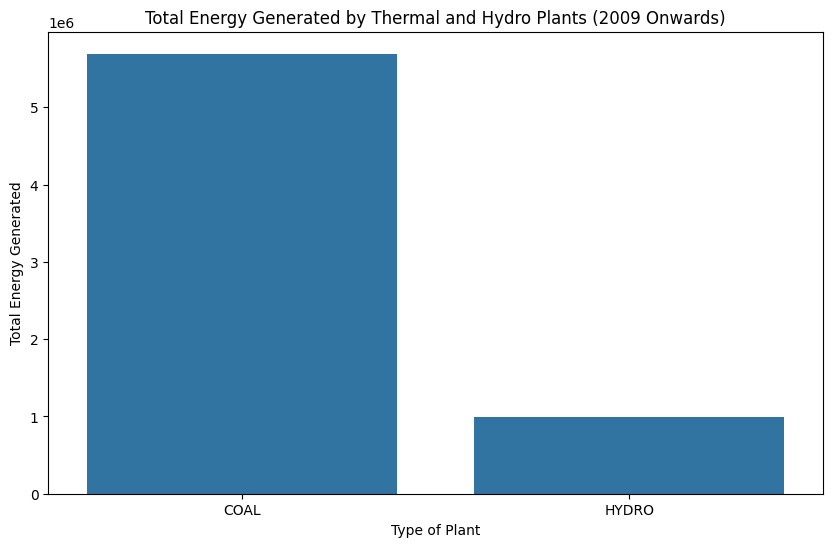

In [5]:
# Comparison of Energy Generation from Thermal and Hydro Plants
df['SourceMonth'] = pd.to_datetime(df['SourceMonth'], format='%b - %Y')
df = df[df['SourceMonth'].dt.year >= 2009]
df_filtered = df[df['Type of fuel used'].isin(['COAL', 'HYDRO'])]
energy_generation = df_filtered.groupby('Type of fuel used')['Actual energy generated'].sum().reset_index()

print(energy_generation)

thermal_energy = df_filtered[df_filtered['Type of fuel used'] == 'COAL']['Actual energy generated']
hydro_energy = df_filtered[df_filtered['Type of fuel used'] == 'HYDRO']['Actual energy generated']
t_stat, p_value = ttest_ind(thermal_energy, hydro_energy, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

plt.figure(figsize=(10, 6))
sns.barplot(x='Type of fuel used', y='Actual energy generated', data=energy_generation)
plt.title('Total Energy Generated by Thermal and Hydro Plants (2009 Onwards)')
plt.xlabel('Type of Plant')
plt.ylabel('Total Energy Generated')
plt.show()

In [6]:
# Category of Plant most prevalent in each state
counts = df.groupby(['State', 'Category of Plant']).size().reset_index(name='counts')
max_counts = counts.loc[counts.groupby('State')['counts'].idxmax()].reset_index()
display(max_counts[['State', 'Category of Plant']])

,State,Category of Plant
0,Andaman And Nicobar Islands,THERMAL
1,Andhra Pradesh,THERMAL
2,Arunachal Pradesh,HYDRO
3,Assam,THERMAL
4,Bihar,THERMAL
5,Chhattisgarh,THERMAL
6,Delhi,THERMAL
7,Goa,THERMAL
8,Gujarat,THERMAL
9,Haryana,THERMAL


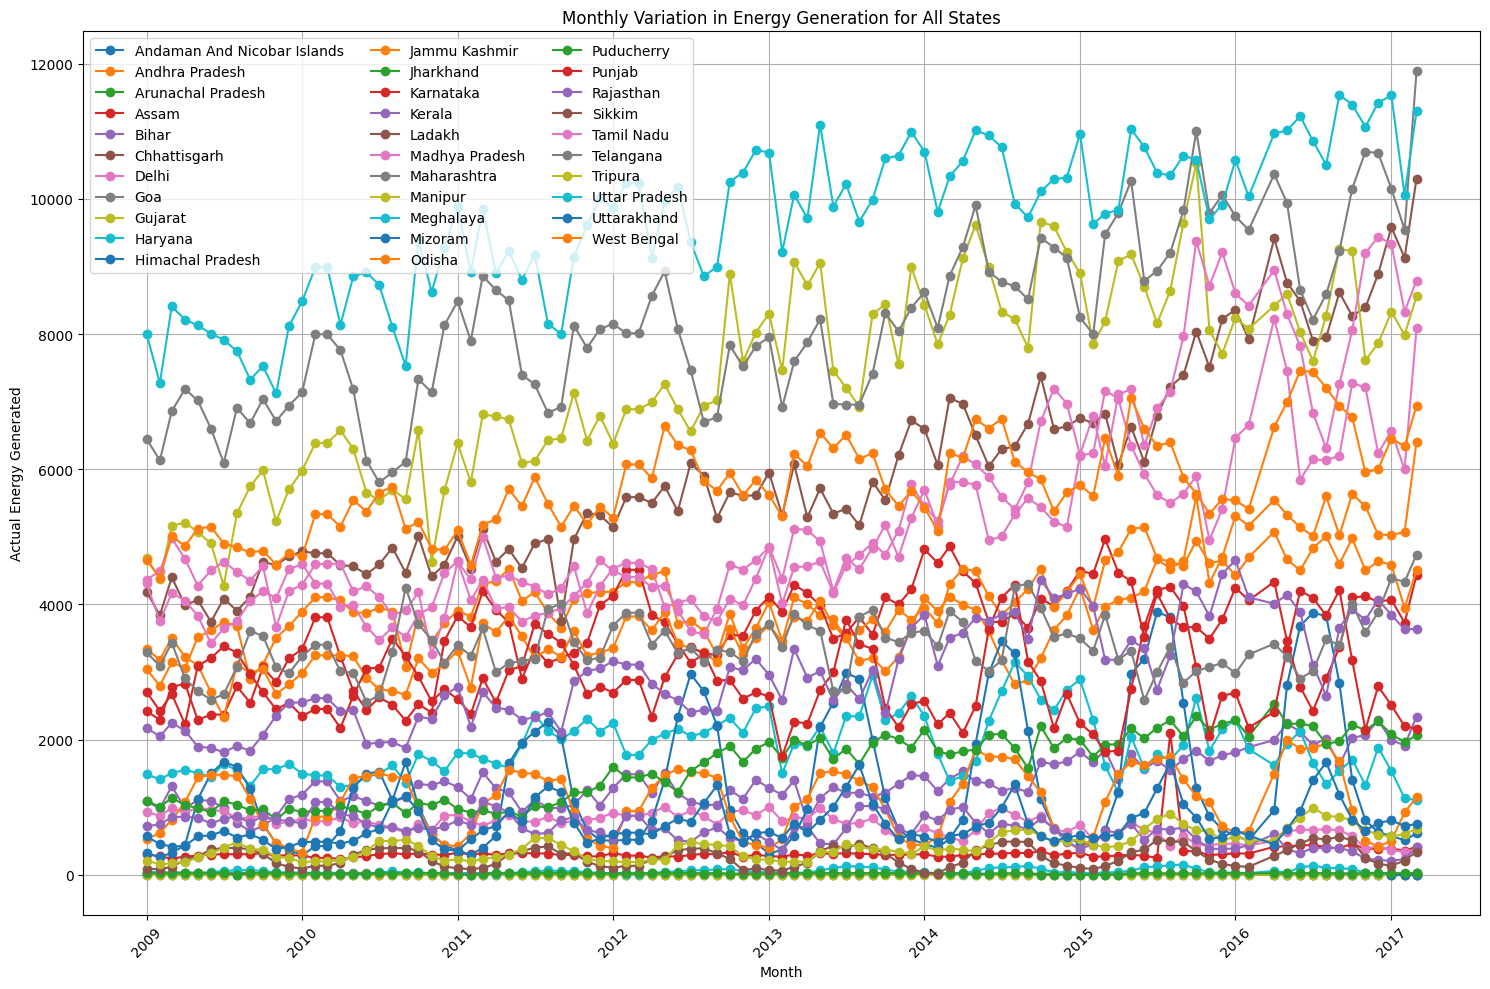

In [7]:
# Monthly variation of energy generation of a particular state 2009 onwards
df['SourceMonth'] = pd.to_datetime(df['SourceMonth'], format='%b - %Y')
df = df[df['SourceMonth'].dt.year >= 2009]
monthly_generation = df.groupby(['State', df['SourceMonth']])['Actual energy generated'].sum().reset_index()
monthly_generation = monthly_generation.sort_values(by=['State', 'SourceMonth'])

states = monthly_generation['State'].unique()
plt.figure(figsize=(15, 10))

for state in states:
    state_data = monthly_generation[monthly_generation['State'] == state]
    plt.plot(state_data['SourceMonth'], state_data['Actual energy generated'], marker='o', label=state)

plt.title('Monthly Variation in Energy Generation for All States')
plt.xlabel('Month')
plt.ylabel('Actual Energy Generated')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Actual Energy Generated Compared to Installed Capacitites across all states in decreasing order
installed_capacities_by_state = df.groupby('State')[['Installed Capacity', 'Actual energy generated']].sum().reset_index()
installed_capacities_by_state['Fraction Energy Produced'] = installed_capacities_by_state['Actual energy generated'] / installed_capacities_by_state['Installed Capacity']
fractional_energy_production_by_state = installed_capacities_by_state[['State', 'Fraction Energy Produced']].sort_values(by='Fraction Energy Produced', ascending=False).reset_index()
display(fractional_energy_production_by_state)

,index,State,Fraction Energy Produced
0,22,Puducherry,0.561675
1,5,Chhattisgarh,0.506847
2,29,Uttar Pradesh,0.506553
3,1,Andhra Pradesh,0.450680
4,24,Rajasthan,0.448022
5,16,Madhya Pradesh,0.438126
6,21,Odisha,0.434320
7,3,Assam,0.423800
8,4,Bihar,0.423396
9,26,Tamil Nadu,0.414481


In [9]:
# Type of fuel most commonly used across all regions
fuel_type_counts = df.groupby(['Region', 'Type of fuel used']).size().reset_index(name='fuel_type_counts')
max_fuel_usage = fuel_type_counts.loc[fuel_type_counts.groupby('Region')['fuel_type_counts'].idxmax()].reset_index()
display(max_fuel_usage[['Region', 'Type of fuel used']])

,Region,Type of fuel used
0,EASTERN,COAL
1,NORTH EASTERN,HYDRO
2,NORTHERN,HYDRO
3,SOUTHERN,HYDRO
4,WESTERN,COAL


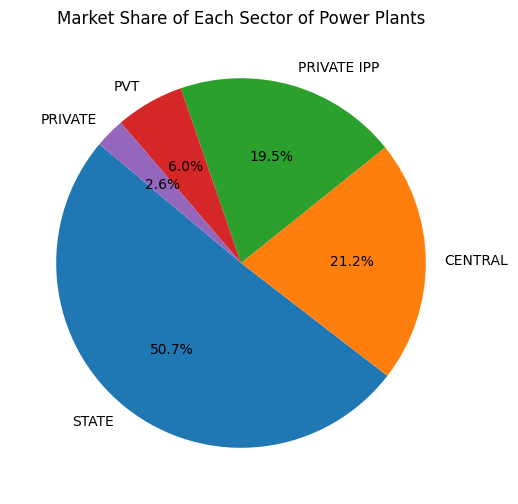

In [10]:
# Market share of the sector of power plants
power_plant_sectors = df['Sector of power plant']
power_plant_sectors_counts = power_plant_sectors.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(power_plant_sectors_counts, labels=power_plant_sectors_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Each Sector of Power Plants')
plt.show()

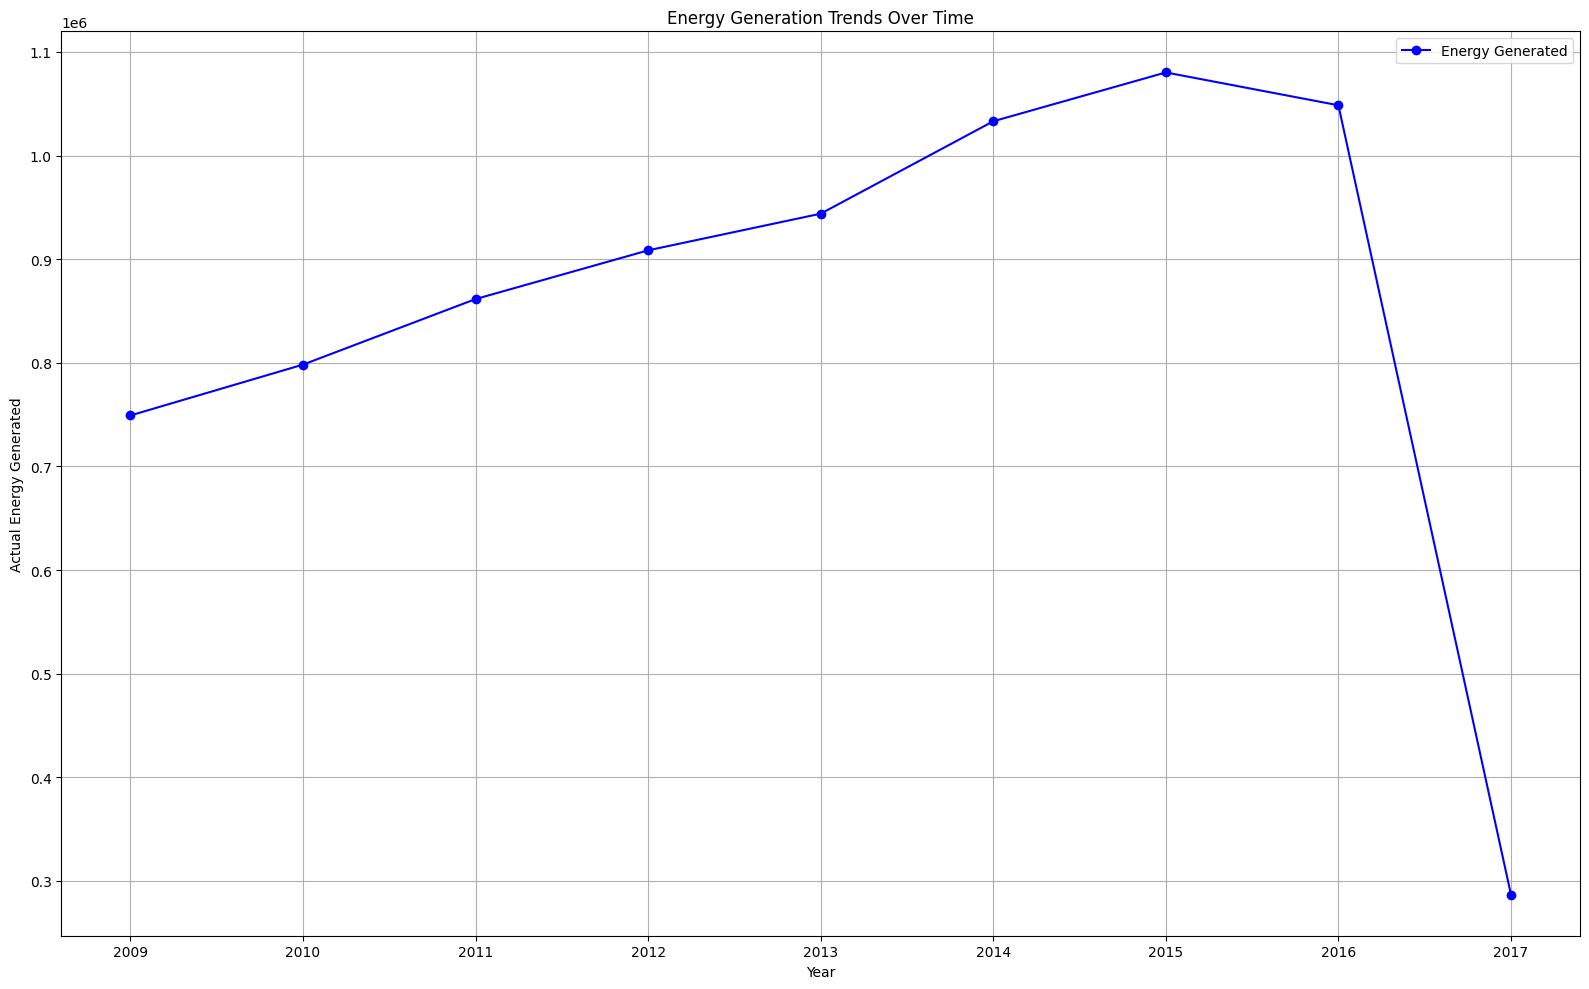

In [11]:
# Plot showing actual energy generation over the years
time_energy_df = df[['YearCode', 'Actual energy generated']]

energy_by_year = time_energy_df.groupby('YearCode')['Actual energy generated'].sum().reset_index()

plt.figure(figsize=(16, 10))
plt.plot(energy_by_year['YearCode'], energy_by_year['Actual energy generated'], marker='o', color='blue', label='Energy Generated')

plt.xlabel('Year')
plt.ylabel('Actual Energy Generated')
plt.title('Energy Generation Trends Over Time')
plt.legend()

years = energy_by_year['YearCode'].unique()

plt.grid(True)
plt.tight_layout()
plt.show()

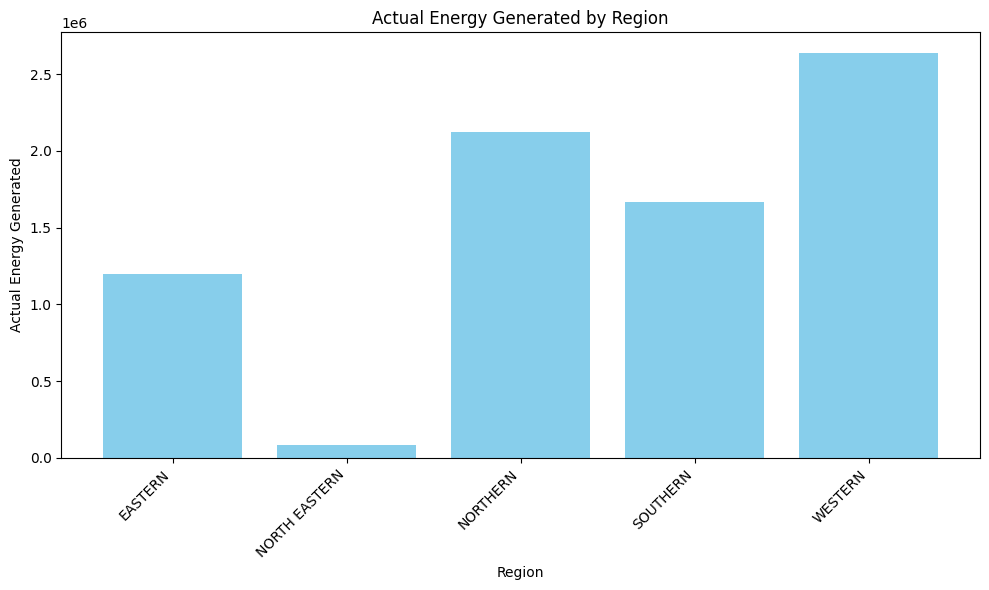

In [12]:
# Bar Chart showing Actual Energy Generation per Region
energy_region_df = df[['Region', 'Actual energy generated']]
energy_by_region = energy_region_df.groupby('Region')['Actual energy generated'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(energy_by_region['Region'], energy_by_region['Actual energy generated'], color='skyblue')

plt.xlabel('Region')
plt.ylabel('Actual Energy Generated')
plt.title('Actual Energy Generated by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Question3

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Importing the datasets
labelled_df = pd.read_csv('Consumer_Dataset.csv')
unlabelled_df = pd.read_csv('Consumer_Test_Dataset.csv')

X = labelled_df.drop('Group', axis = 1)
y = labelled_df['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Preprocessing of features
numeric_features = ['Age', 'Family_Size', 'Work_Experience']
categorical_features = ['Gender', 'Ever_Married', 'Profession', 'Graduated', 'Energy_Consumption', 'Preferred_Renewable']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [4]:
# Training the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Family_Size',
                                                   'Work_Experience']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Ever_Married',
                                                   'Profession', 'Graduated',
                                                   'Energy_Consumption',
                                                   'Preferred_Renewable'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [5]:
y_pred = model.predict(X_test)

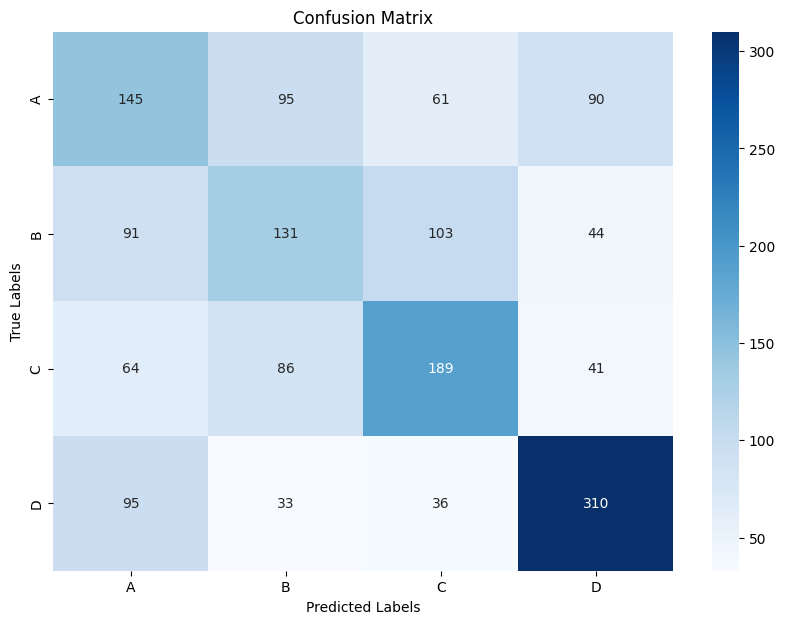

In [6]:
# Plotting the confusion matrix for visualising the results
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [7]:
# The classification report
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

           A       0.37      0.37      0.37       391
           B       0.38      0.36      0.37       369
           C       0.49      0.50      0.49       380
           D       0.64      0.65      0.65       474

    accuracy                           0.48      1614
   macro avg       0.47      0.47      0.47      1614
weighted avg       0.48      0.48      0.48      1614



In [8]:
# Using model for the unlabelled dataset
unlabelled_predictions = model.predict(unlabelled_df)
unlabelled_df['Group'] = unlabelled_predictions
unlabelled_df.to_csv('Predictions_for_Unlabelled_Dataset.csv', index=False)

In [9]:
# Displaying the predictions
prediction_df = pd.read_csv('Predictions_for_Unlabelled_Dataset.csv')
display(prediction_df)

,Unnamed: 0,Gender,Age,Ever_Married,Family_Size,Profession,Graduated,Work_Experience,Energy_Consumption,Preferred_Renewable,Group
0,0,Female,36,Yes,1.0,Engineer,Yes,0.0,Low,Solar,A
1,1,Male,37,Yes,4.0,Healthcare,Yes,8.0,Average,Solar,C
2,2,Female,69,Yes,1.0,NaN,No,0.0,Low,Solar,A
3,3,Male,59,Yes,2.0,Executive,No,11.0,High,Solar,C
4,4,Female,19,No,4.0,Marketing,No,NaN,Low,Solar,D
...,...,...,...,...,...,...,...,...,...,...,...
2622,2622,Male,29,No,4.0,Healthcare,No,9.0,Low,Solar,D
2623,2623,Female,35,No,1.0,Doctor,Yes,1.0,Low,Solar,B
2624,2624,Female,53,No,2.0,Entertainment,Yes,NaN,Low,Solar,A
2625,2625,Male,47,Yes,5.0,Executive,Yes,1.0,High,Hydro,C


# Question 5

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Importing the datasets
unlabelled_df = pd.read_csv('Consumer_Test_Dataset.csv')

In [3]:
# Preprocessing of features
numeric_features = ['Age', 'Family_Size', 'Work_Experience']
categorical_features = ['Gender', 'Ever_Married', 'Profession', 'Graduated', 'Energy_Consumption', 'Preferred_Renewable']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X_preprocessed = preprocessor.fit_transform(unlabelled_df)

In [4]:
# Implementing the K Means Clustering Algorithm
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
unlabelled_df['Group'] = kmeans.fit_predict(X_preprocessed)

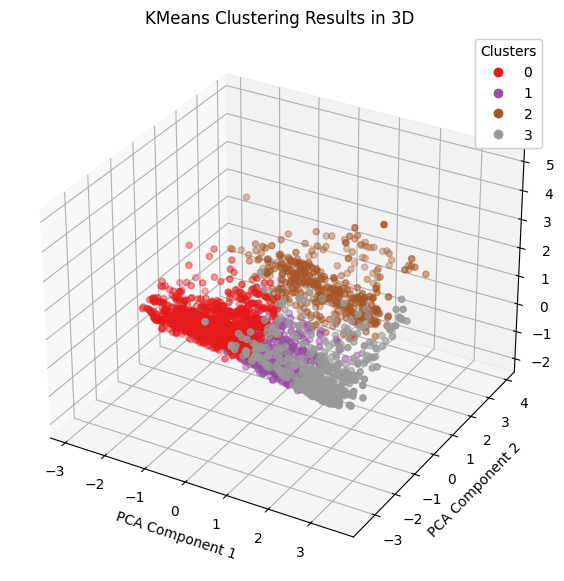

In [5]:
# Displaying the K-Means results using 3d Principal Component Analysis
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_preprocessed)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Group'] = unlabelled_df['Group']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], c=df_pca['Group'], cmap='Set1')

ax.set_title('KMeans Clustering Results in 3D')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

In [6]:
# Map from clusters to labels
cluster_to_label = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D'
}

In [7]:
#Saving the results
unlabelled_df['Group'] = unlabelled_df['Group'].map(cluster_to_label)
unlabelled_df.to_csv('Predictions_using_Clustering.csv', index=False)

In [8]:
# Displaying the predictions
predicted_df = pd.read_csv('Predictions_using_Clustering.csv')
display(predicted_df)

,Unnamed: 0,Gender,Age,Ever_Married,Family_Size,Profession,Graduated,Work_Experience,Energy_Consumption,Preferred_Renewable,Group
0,0,Female,36,Yes,1.0,Engineer,Yes,0.0,Low,Solar,B
1,1,Male,37,Yes,4.0,Healthcare,Yes,8.0,Average,Solar,C
2,2,Female,69,Yes,1.0,NaN,No,0.0,Low,Solar,A
3,3,Male,59,Yes,2.0,Executive,No,11.0,High,Solar,C
4,4,Female,19,No,4.0,Marketing,No,NaN,Low,Solar,D
...,...,...,...,...,...,...,...,...,...,...,...
2622,2622,Male,29,No,4.0,Healthcare,No,9.0,Low,Solar,C
2623,2623,Female,35,No,1.0,Doctor,Yes,1.0,Low,Solar,B
2624,2624,Female,53,No,2.0,Entertainment,Yes,NaN,Low,Solar,B
2625,2625,Male,47,Yes,5.0,Executive,Yes,1.0,High,Hydro,A


# Question 7

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)

In [2]:
# Importing the datasets
labeled_data = pd.read_csv('Email_Dataset.csv')

In [3]:
# Importing the Natural Language Toolkit
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adityasingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adityasingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Function to perform preprocessing of the email message
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

In [5]:
# Preprocessing of the data
labeled_data['MESSAGE'] = labeled_data['MESSAGE'].apply(preprocess_text)

X = labeled_data['MESSAGE']
y = labeled_data['CATEGORY'].map({'Spam': 1, 'Not Spam': 0})

In [6]:
# Vectorising the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X).toarray()

In [7]:
# Training the model
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Using the model on the test dataset
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9775
Precision: 1.0
Recall: 0.9086294416243654
F1 Score: 0.9521276595744681


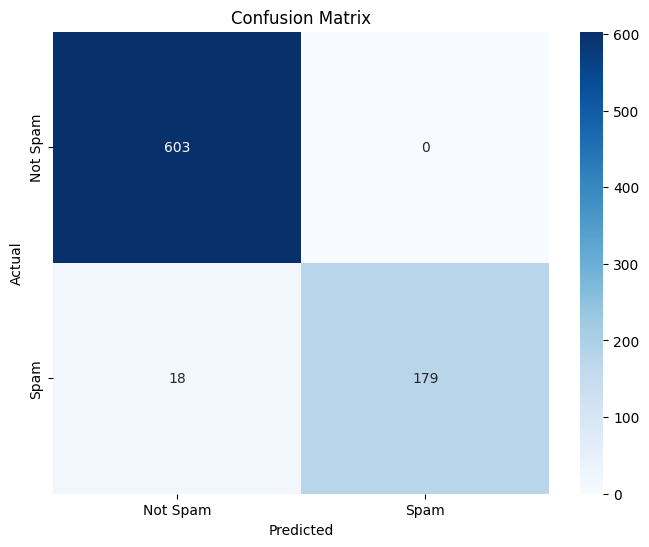

In [9]:
# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Using the model on the unlabelled dataset
unlabeled_data = pd.read_csv('Email_Test_Data.csv')
unlabeled_data['MESSAGE'] = unlabeled_data['MESSAGE'].apply(preprocess_text)

X_unlabeled_tfidf = tfidf.transform(unlabeled_data['MESSAGE']).toarray()

unlabeled_data['CATEGORY'] = model.predict(X_unlabeled_tfidf)
unlabeled_data['CATEGORY'] = unlabeled_data['CATEGORY'].map({1: 'Spam', 0: 'Not Spam'})

unlabeled_data.to_csv('Classified_Emails.csv', index=False)

In [11]:
# Displaying the predictions
predicted_df = pd.read_csv('Classified_Emails.csv')
display(predicted_df)

,Unnamed: 0,MESSAGE,CATEGORY
0,0,dear homeowner interest rate lowest point year...,Spam
1,1,attention must computer user new special packa...,Spam
2,2,multi part message mime format nextpart cdc c ...,Spam
3,3,important information new domain name finally ...,Spam
4,4,bottom line give away cd free people like one ...,Spam
...,...,...,...
995,995,following advertisement sponsored avirtualshop...,Spam
996,996,long time chat like trying trying almost every...,Spam
997,997,china rapid economic growth ranked world bank ...,Spam
998,998,dear homeowner yr fixed rate mortgage interest...,Spam
